<h1>ENB6</h1><br>
<h2>same FF networks as ENB5 but with 8 epochs</h2><br>
Some more experimentation with simple feed forward networks.  These experiments will be simple and will follow some of the guidance I've found re; starting points with layers and neurons.  I will be keeping the number hidden layers limited to no greater than 2 for this round of experiments and all of the layers will have the same number of nuerons. The number of nuerons will be determined as a % of the input layer and will be 150%, 125%, 100%, 75%, 50% & 25%.

In [7]:
summary =[]
test_no = 1

In [1]:
import numpy as np
import tensorflow as tf
import os
import csv
import matplotlib.pyplot as plt
from keras import models
from keras import layers

C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Ryan\anaconda3\envs\tensorflow_env\lib\s

<h2>Pre-processing</h2>

In [2]:
import pre_process as pp

In [3]:
import pickle

In [4]:
data, labels = pp.pre_process()

concatenating files
AReMv1\bending1\dataset1.csv
AReMv1\bending1\dataset2.csv
AReMv1\bending1\dataset3.csv
AReMv1\bending1\dataset4.csv
AReMv1\bending1\dataset5.csv
AReMv1\bending1\dataset6.csv
AReMv1\bending1\dataset7.csv
AReMv1\bending2\dataset1.csv
AReMv1\bending2\dataset2.csv
AReMv1\bending2\dataset3.csv
AReMv1\bending2\dataset5.csv
AReMv1\bending2\dataset6.csv
AReMv1\cycling\dataset1.csv
AReMv1\cycling\dataset10.csv
AReMv1\cycling\dataset11.csv
AReMv1\cycling\dataset12.csv
AReMv1\cycling\dataset13.csv
AReMv1\cycling\dataset14.csv
AReMv1\cycling\dataset15.csv
AReMv1\cycling\dataset2.csv
AReMv1\cycling\dataset3.csv
AReMv1\cycling\dataset4.csv
AReMv1\cycling\dataset5.csv
AReMv1\cycling\dataset6.csv
AReMv1\cycling\dataset7.csv
AReMv1\cycling\dataset8.csv
AReMv1\cycling\dataset9.csv
AReMv1\lying\dataset1.csv
AReMv1\lying\dataset10.csv
AReMv1\lying\dataset11.csv
AReMv1\lying\dataset12.csv
AReMv1\lying\dataset13.csv
AReMv1\lying\dataset14.csv
AReMv1\lying\dataset15.csv
AReMv1\lying\datas

In [136]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = pp.cluster_shuffle(data, labels)

SHUFFLING ARRAYS
act0 shape:  (7, 480, 6)
act1 shape:  (5, 480, 6)
act2 shape:  (15, 480, 6)
act3 shape:  (15, 480, 6)
act4 shape:  (15, 480, 6)
act5 shape:  (15, 480, 6)
act6 shape:  (15, 480, 6)
SLICING ARRAYS
(4, 480, 6)
(2, 480, 6)
(1, 480, 6)


In [6]:
print(np.shape(train_data))
print(np.shape(train_labels))
print(np.shape(val_data))
print(np.shape(val_labels))
print(np.shape(test_data))
print(np.shape(test_labels))

(52, 480, 6)
(52,)
(18, 480, 6)
(18,)
(17, 480, 6)
(17,)


<h2>Exp:6a</h2><br>
1 layer, 720 neurons

In [137]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (720, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_74 (Dense)             (None, 480, 720)          346320    
_________________________________________________________________
flatten_25 (Flatten)         (None, 345600)            0         
_________________________________________________________________
dense_75 (Dense)             (None, 7)                 2419207   
Total params: 2,768,887
Trainable params: 2,768,887
Non-trainable params: 0
_________________________________________________________________


In [138]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 8, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/8
52/52 [==============================] - 1s 19ms/step - loss: 2.1178 - accuracy: 0.0962 - val_loss: 1.9088 - val_accuracy: 0.1667
Epoch 2/8
52/52 [==============================] - 0s 9ms/step - loss: 1.8190 - accuracy: 0.2115 - val_loss: 1.7463 - val_accuracy: 0.2778
Epoch 3/8
52/52 [==============================] - 0s 9ms/step - loss: 1.6619 - accuracy: 0.2692 - val_loss: 1.6197 - val_accuracy: 0.5000
Epoch 4/8
52/52 [==============================] - 0s 9ms/step - loss: 1.3584 - accuracy: 0.4423 - val_loss: 1.3262 - val_accuracy: 0.5000
Epoch 5/8
52/52 [==============================] - 0s 9ms/step - loss: 1.2243 - accuracy: 0.4615 - val_loss: 1.3595 - val_accuracy: 0.4444
Epoch 6/8
52/52 [==============================] - 0s 9ms/step - loss: 1.0656 - accuracy: 0.5385 - val_loss: 1.4506 - val_accuracy: 0.3333
Epoch 7/8
52/52 [==============================] - 0s 9ms/step - loss: 1.0355 - accuracy: 0.4615 - val_loss: 1.4119 - val

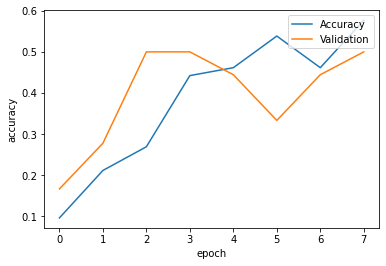

In [139]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

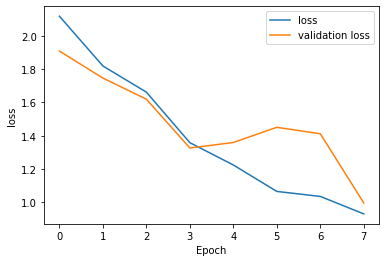

In [140]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [141]:
f = net.evaluate(test_data, test_labels)
f.insert(0,'720')
f.insert(1,test_no)
test_no = test_no + 1
summary.append(f)

17/17 [==============================] - 0s 3ms/step


<h2>Exp:6b</h2><br>
1layer 600 nuerons

In [142]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (600, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_77 (Dense)             (None, 480, 600)          288600    
_________________________________________________________________
flatten_26 (Flatten)         (None, 288000)            0         
_________________________________________________________________
dense_78 (Dense)             (None, 7)                 2016007   
Total params: 2,307,967
Trainable params: 2,307,967
Non-trainable params: 0
_________________________________________________________________


In [143]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 8, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/8
52/52 [==============================] - 1s 18ms/step - loss: 2.8505 - accuracy: 0.0962 - val_loss: 2.2598 - val_accuracy: 0.1667
Epoch 2/8
52/52 [==============================] - 0s 8ms/step - loss: 2.0586 - accuracy: 0.1731 - val_loss: 1.8002 - val_accuracy: 0.1667
Epoch 3/8
52/52 [==============================] - 0s 8ms/step - loss: 1.7822 - accuracy: 0.2308 - val_loss: 1.6946 - val_accuracy: 0.3333
Epoch 4/8
52/52 [==============================] - 0s 8ms/step - loss: 1.6072 - accuracy: 0.3462 - val_loss: 1.6303 - val_accuracy: 0.3333
Epoch 5/8
52/52 [==============================] - 0s 8ms/step - loss: 1.4209 - accuracy: 0.3846 - val_loss: 1.3907 - val_accuracy: 0.3333
Epoch 6/8
52/52 [==============================] - 0s 8ms/step - loss: 1.1765 - accuracy: 0.4423 - val_loss: 1.2407 - val_accuracy: 0.4444
Epoch 7/8
52/52 [==============================] - 0s 9ms/step - loss: 1.0088 - accuracy: 0.5000 - val_loss: 1.3575 - val

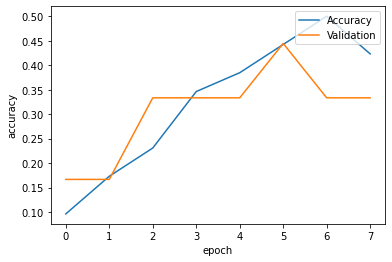

In [144]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

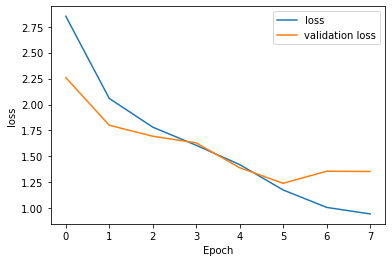

In [145]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [146]:
f = net.evaluate(test_data, test_labels)
f.insert(0,'600')
f.insert(1,test_no)
test_no = test_no + 1
summary.append(f)

17/17 [==============================] - 0s 3ms/step


<h2>Exp:6c</h2><br>
1 layer 480 nuerons

In [147]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (480, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_80 (Dense)             (None, 480, 480)          230880    
_________________________________________________________________
flatten_27 (Flatten)         (None, 230400)            0         
_________________________________________________________________
dense_81 (Dense)             (None, 7)                 1612807   
Total params: 1,847,047
Trainable params: 1,847,047
Non-trainable params: 0
_________________________________________________________________


In [148]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 8, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/8
52/52 [==============================] - 1s 17ms/step - loss: 2.2116 - accuracy: 0.2308 - val_loss: 2.0559 - val_accuracy: 0.1667
Epoch 2/8
52/52 [==============================] - 0s 6ms/step - loss: 1.9652 - accuracy: 0.1731 - val_loss: 1.7559 - val_accuracy: 0.2778
Epoch 3/8
52/52 [==============================] - 0s 6ms/step - loss: 1.7622 - accuracy: 0.2115 - val_loss: 1.6296 - val_accuracy: 0.2778
Epoch 4/8
52/52 [==============================] - 0s 6ms/step - loss: 1.5244 - accuracy: 0.4615 - val_loss: 1.4875 - val_accuracy: 0.3889
Epoch 5/8
52/52 [==============================] - 0s 6ms/step - loss: 1.2963 - accuracy: 0.2692 - val_loss: 1.4452 - val_accuracy: 0.3333
Epoch 6/8
52/52 [==============================] - 0s 6ms/step - loss: 1.0964 - accuracy: 0.4423 - val_loss: 1.2292 - val_accuracy: 0.3889
Epoch 7/8
52/52 [==============================] - 0s 6ms/step - loss: 0.9164 - accuracy: 0.6346 - val_loss: 1.2591 - val

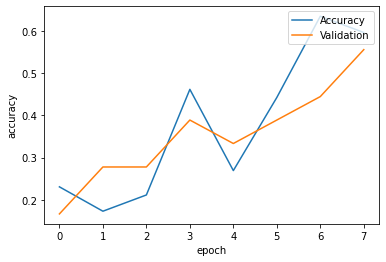

In [149]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

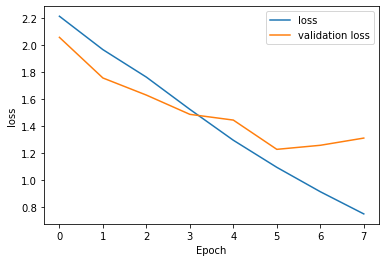

In [150]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [151]:
f = net.evaluate(test_data, test_labels)
f.insert(0,'480')
f.insert(1,test_no)
test_no = test_no + 1
summary.append(f)

17/17 [==============================] - 0s 2ms/step


<h2>Exp:6d</h2>
<br>
1 layer 360 neurons

In [152]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (360, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_83 (Dense)             (None, 480, 360)          173160    
_________________________________________________________________
flatten_28 (Flatten)         (None, 172800)            0         
_________________________________________________________________
dense_84 (Dense)             (None, 7)                 1209607   
Total params: 1,386,127
Trainable params: 1,386,127
Non-trainable params: 0
_________________________________________________________________


In [153]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 8, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/8
52/52 [==============================] - 1s 16ms/step - loss: 2.0222 - accuracy: 0.1538 - val_loss: 1.8475 - val_accuracy: 0.1667
Epoch 2/8
52/52 [==============================] - 0s 5ms/step - loss: 1.7922 - accuracy: 0.1923 - val_loss: 1.7546 - val_accuracy: 0.3333
Epoch 3/8
52/52 [==============================] - 0s 5ms/step - loss: 1.6370 - accuracy: 0.4231 - val_loss: 1.4493 - val_accuracy: 0.4444
Epoch 4/8
52/52 [==============================] - 0s 5ms/step - loss: 1.2460 - accuracy: 0.5385 - val_loss: 1.2969 - val_accuracy: 0.3889
Epoch 5/8
52/52 [==============================] - 0s 5ms/step - loss: 1.2114 - accuracy: 0.4038 - val_loss: 1.1978 - val_accuracy: 0.4444
Epoch 6/8
52/52 [==============================] - 0s 5ms/step - loss: 0.9573 - accuracy: 0.6538 - val_loss: 1.3129 - val_accuracy: 0.4444
Epoch 7/8
52/52 [==============================] - 0s 5ms/step - loss: 0.9567 - accuracy: 0.5962 - val_loss: 1.0823 - val

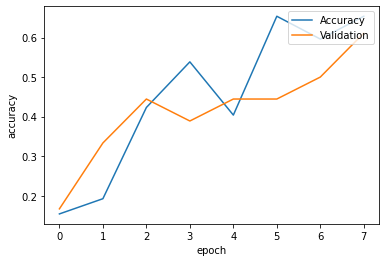

In [154]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

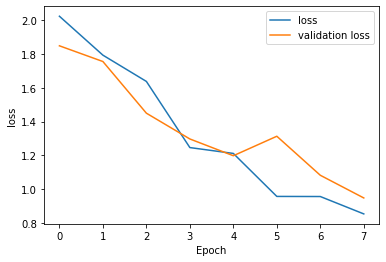

In [155]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [156]:
f = net.evaluate(test_data, test_labels)
f.insert(0,'360')
f.insert(1,test_no)
test_no = test_no + 1
summary.append(f)

17/17 [==============================] - 0s 2ms/step


<h2>Exp:6e</h2><br>
1 layer 240 neurons

In [157]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (240, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_86 (Dense)             (None, 480, 240)          115440    
_________________________________________________________________
flatten_29 (Flatten)         (None, 115200)            0         
_________________________________________________________________
dense_87 (Dense)             (None, 7)                 806407    
Total params: 925,207
Trainable params: 925,207
Non-trainable params: 0
_________________________________________________________________


In [158]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 8, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/8
52/52 [==============================] - 1s 15ms/step - loss: 2.0768 - accuracy: 0.0577 - val_loss: 1.8513 - val_accuracy: 0.1667
Epoch 2/8
52/52 [==============================] - 0s 4ms/step - loss: 1.7893 - accuracy: 0.2500 - val_loss: 1.7073 - val_accuracy: 0.4444
Epoch 3/8
52/52 [==============================] - 0s 4ms/step - loss: 1.6527 - accuracy: 0.5000 - val_loss: 1.4999 - val_accuracy: 0.3333
Epoch 4/8
52/52 [==============================] - 0s 4ms/step - loss: 1.3868 - accuracy: 0.4423 - val_loss: 1.3493 - val_accuracy: 0.4444
Epoch 5/8
52/52 [==============================] - 0s 4ms/step - loss: 1.1885 - accuracy: 0.4231 - val_loss: 1.4749 - val_accuracy: 0.4444
Epoch 6/8
52/52 [==============================] - 0s 3ms/step - loss: 1.1161 - accuracy: 0.6154 - val_loss: 1.1858 - val_accuracy: 0.5000
Epoch 7/8
52/52 [==============================] - 0s 3ms/step - loss: 0.9267 - accuracy: 0.5577 - val_loss: 1.2079 - val

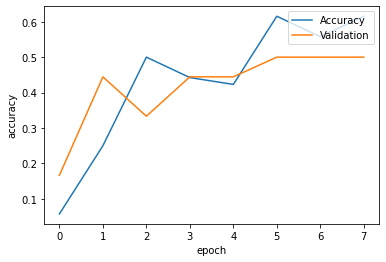

In [159]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

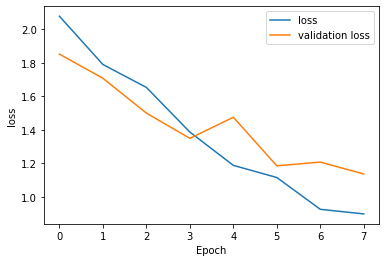

In [160]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [161]:
f = net.evaluate(test_data, test_labels)
f.insert(0,'240')
f.insert(1,test_no)
test_no = test_no + 1
summary.append(f)

17/17 [==============================] - 0s 1ms/step


<h2>Exp:6f</h2>
<br>
1 layer 120 neurons

In [162]:
net = models.Sequential()
net.add(layers.Dense(480, input_shape = (480,6)))
net.add(layers.Dense (120, activation = 'relu'))
net.add(layers.Flatten())
net.add(layers.Dense(7, activation = 'sigmoid'))
net.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
dense_89 (Dense)             (None, 480, 120)          57720     
_________________________________________________________________
flatten_30 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_90 (Dense)             (None, 7)                 403207    
Total params: 464,287
Trainable params: 464,287
Non-trainable params: 0
_________________________________________________________________


In [163]:
net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = net.fit(train_data, train_labels, epochs = 8, validation_data = (val_data, val_labels))

Train on 52 samples, validate on 18 samples
Epoch 1/8
52/52 [==============================] - 1s 14ms/step - loss: 1.9781 - accuracy: 0.0962 - val_loss: 1.8618 - val_accuracy: 0.1667
Epoch 2/8
52/52 [==============================] - 0s 2ms/step - loss: 1.8166 - accuracy: 0.1923 - val_loss: 1.6846 - val_accuracy: 0.1667
Epoch 3/8
52/52 [==============================] - 0s 2ms/step - loss: 1.6198 - accuracy: 0.2308 - val_loss: 1.5354 - val_accuracy: 0.3333
Epoch 4/8
52/52 [==============================] - 0s 2ms/step - loss: 1.4270 - accuracy: 0.3846 - val_loss: 1.3146 - val_accuracy: 0.5556
Epoch 5/8
52/52 [==============================] - 0s 2ms/step - loss: 1.1981 - accuracy: 0.6154 - val_loss: 1.1745 - val_accuracy: 0.5000
Epoch 6/8
52/52 [==============================] - 0s 2ms/step - loss: 1.0479 - accuracy: 0.5192 - val_loss: 1.1360 - val_accuracy: 0.7222
Epoch 7/8
52/52 [==============================] - 0s 2ms/step - loss: 0.8730 - accuracy: 0.7308 - val_loss: 1.1568 - val

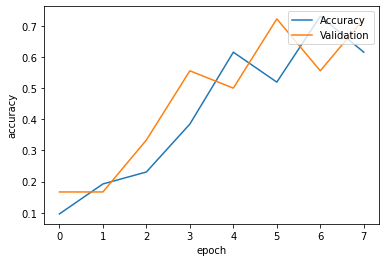

In [164]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy','Validation'], loc='upper right')
plt.show()

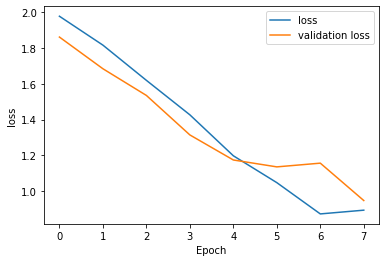

In [165]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['loss','validation loss'], loc='upper right')
plt.show()

In [166]:
f = net.evaluate(test_data, test_labels)
f.insert(0,'120')
f.insert(1,test_no)
test_no = test_no + 1
summary.append(f)


17/17 [==============================] - 0s 1ms/step


In [167]:
print(summary)

[['720', 1, 1.0870639085769653, 0.529411792755127], ['600', 2, 1.0768146514892578, 0.5882353186607361], ['480', 3, 1.3259824514389038, 0.529411792755127], ['360', 4, 0.9984512329101562, 0.529411792755127], ['240', 5, 1.0891245603561401, 0.47058823704719543], ['120', 6, 0.9479705691337585, 0.7647058963775635], ['720', 7, 0.8584746718406677, 0.4117647111415863], ['600', 8, 0.9286292791366577, 0.5882353186607361], ['480', 9, 0.9420914649963379, 0.529411792755127], ['360', 10, 0.9739151000976562, 0.5882353186607361], ['240', 11, 0.8426254391670227, 0.3529411852359772], ['120', 12, 0.9990897178649902, 0.4117647111415863], ['720', 13, 1.217249870300293, 0.4117647111415863], ['600', 14, 1.302530288696289, 0.4117647111415863], ['480', 15, 0.9496078491210938, 0.529411792755127], ['360', 16, 0.9441304206848145, 0.529411792755127], ['240', 17, 1.0322977304458618, 0.529411792755127], ['120', 18, 1.0289490222930908, 0.529411792755127], ['720', 19, 0.9870951175689697, 0.4117647111415863], ['600', 20

In [168]:
with open('ENB6_results.txt', 'wb') as fp:
    pickle.dump(summary, fp)